In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("brics_trade_data_enriched_final.csv")
df.head()

,Year,Country,Exports_USD_Billion,Imports_USD_Billion,GDP_USD_Trillion,Trade_Balance,Sanctions_Impact_Index,Currency_Stability_Index,Trade_Partners,Notes,Sanctions_Imposed_By,Sanction_Reasons
0,2010,Brazil,1606.09,1798.23,1.97,-192.14,1,66,15,Stable global trade operations.,NaN,NaN
1,2010,Russia,1773.34,248.13,15.92,1525.21,7,61,5,Travel bans and asset freezes on officials,USA,Human rights abuses (Magnitsky Act)
2,2010,India,227.52,252.16,17.78,-24.64,12,58,9,Stable global trade operations.,NaN,NaN
3,2010,USA,1400.00,1800.00,15.00,-400.00,10,90,80,Stable global trade operations. Managed trade ...,NaN,NaN
4,2010,China,1009.07,1245.04,4.31,-235.97,9,79,22,"IP theft, unfair subsidies, cyber activity","USA, EU","WTO disputes, anti-dumping tariffs"


In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [7]:
!pip install seaborn



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import seaborn as sns

In [10]:
df = pd.read_csv("brics_trade_data_enriched_final.csv")
df.head()

,Year,Country,Exports_USD_Billion,Imports_USD_Billion,GDP_USD_Trillion,Trade_Balance,Sanctions_Impact_Index,Currency_Stability_Index,Trade_Partners,Notes,Sanctions_Imposed_By,Sanction_Reasons
0,2010,Brazil,1606.09,1798.23,1.97,-192.14,1,66,15,Stable global trade operations.,NaN,NaN
1,2010,Russia,1773.34,248.13,15.92,1525.21,7,61,5,Travel bans and asset freezes on officials,USA,Human rights abuses (Magnitsky Act)
2,2010,India,227.52,252.16,17.78,-24.64,12,58,9,Stable global trade operations.,NaN,NaN
3,2010,USA,1400.00,1800.00,15.00,-400.00,10,90,80,Stable global trade operations. Managed trade ...,NaN,NaN
4,2010,China,1009.07,1245.04,4.31,-235.97,9,79,22,"IP theft, unfair subsidies, cyber activity","USA, EU","WTO disputes, anti-dumping tariffs"


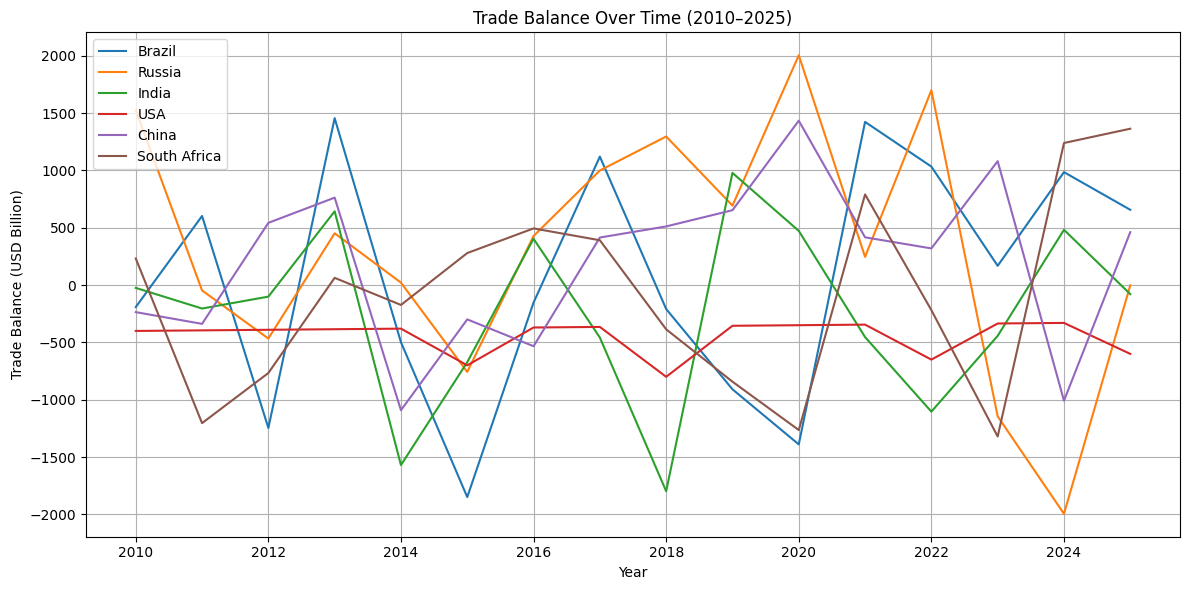

In [11]:
plt.figure(figsize=(12, 6))

for country in df['Country'].unique():
    country_data = df[df['Country'] == country]
    plt.plot(country_data['Year'], country_data['Trade_Balance'], label=country)

plt.title("Trade Balance Over Time (2010–2025)")
plt.xlabel("Year")
plt.ylabel("Trade Balance (USD Billion)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

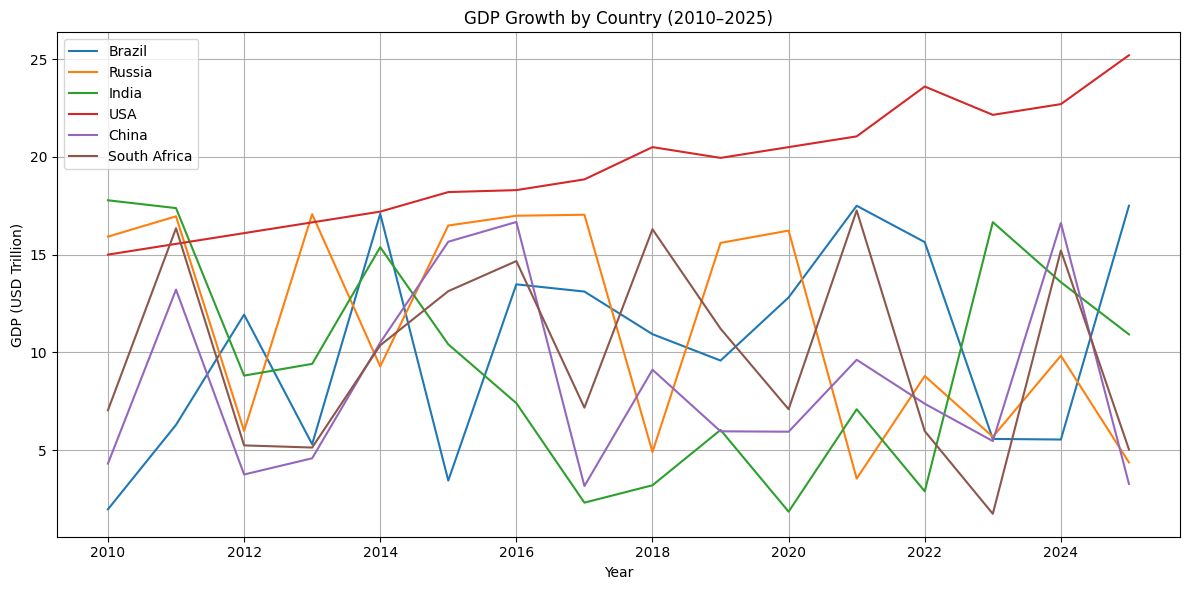

In [12]:
plt.figure(figsize=(12, 6))

for country in df['Country'].unique():
    country_data = df[df['Country'] == country]
    plt.plot(country_data['Year'], country_data['GDP_USD_Trillion'], label=country)

plt.title("GDP Growth by Country (2010–2025)")
plt.xlabel("Year")
plt.ylabel("GDP (USD Trillion)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

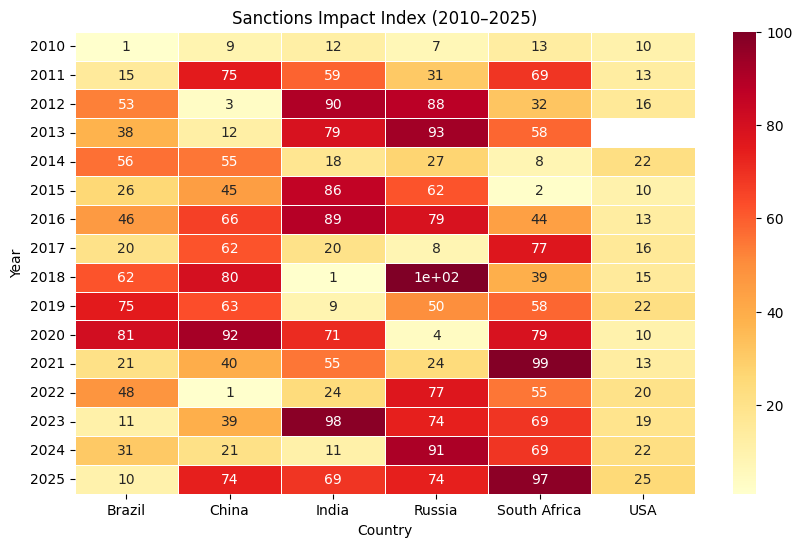

In [13]:
pivot = df.pivot_table(index="Year", columns="Country", values="Sanctions_Impact_Index")
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, cmap="YlOrRd", linewidths=0.5)
plt.title("Sanctions Impact Index (2010–2025)")
plt.show()

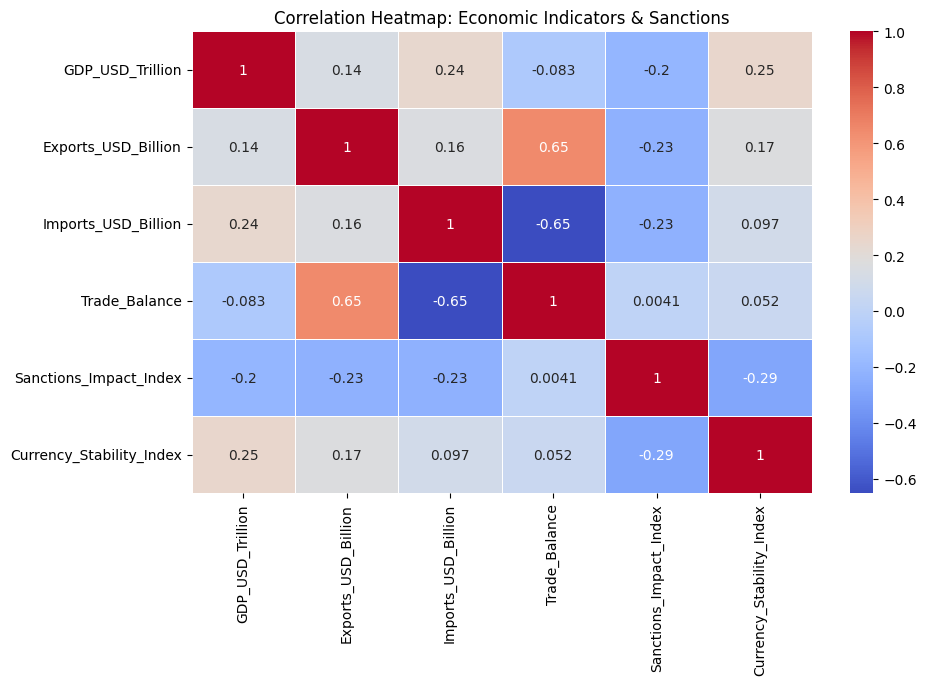

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_df = df[[
    'GDP_USD_Trillion',
    'Exports_USD_Billion',
    'Imports_USD_Billion',
    'Trade_Balance',
    'Sanctions_Impact_Index',
    'Currency_Stability_Index'
]]

correlation = corr_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap: Economic Indicators & Sanctions")
plt.show()

In [16]:
#Values close to 1.00 → strong positive correlation

#Values close to -1.00 → strong negative correlation

#Values near 0.00 → no correlation

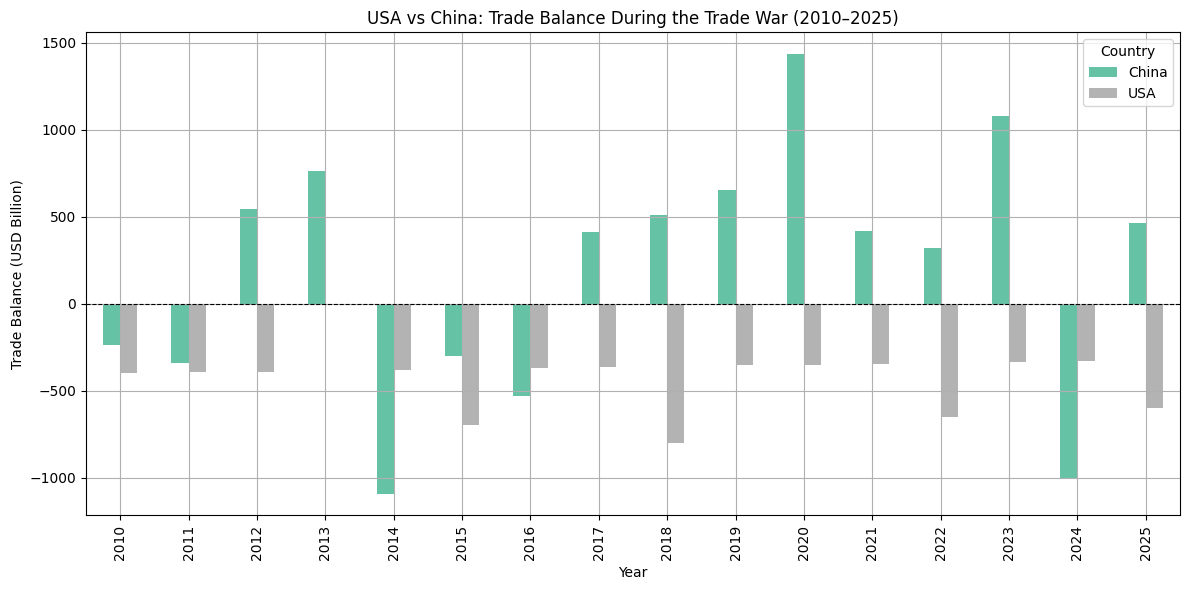

In [17]:
import matplotlib.pyplot as plt


filtered_df = df[
    (df['Country'].isin(['USA', 'China'])) & 
    (df['Year'] >= 2010)
]


pivot_df = filtered_df.pivot(index='Year', columns='Country', values='Trade_Balance')


pivot_df.plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title("USA vs China: Trade Balance During the Trade War (2010–2025)")
plt.xlabel("Year")
plt.ylabel("Trade Balance (USD Billion)")
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.grid(True)
plt.legend(title="Country")
plt.tight_layout()
plt.show()

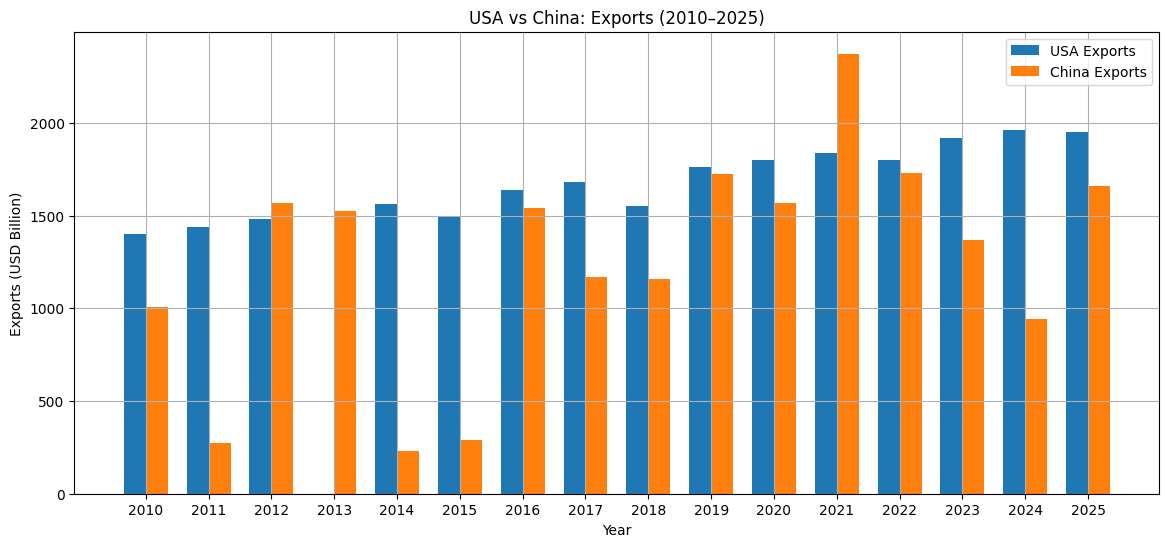

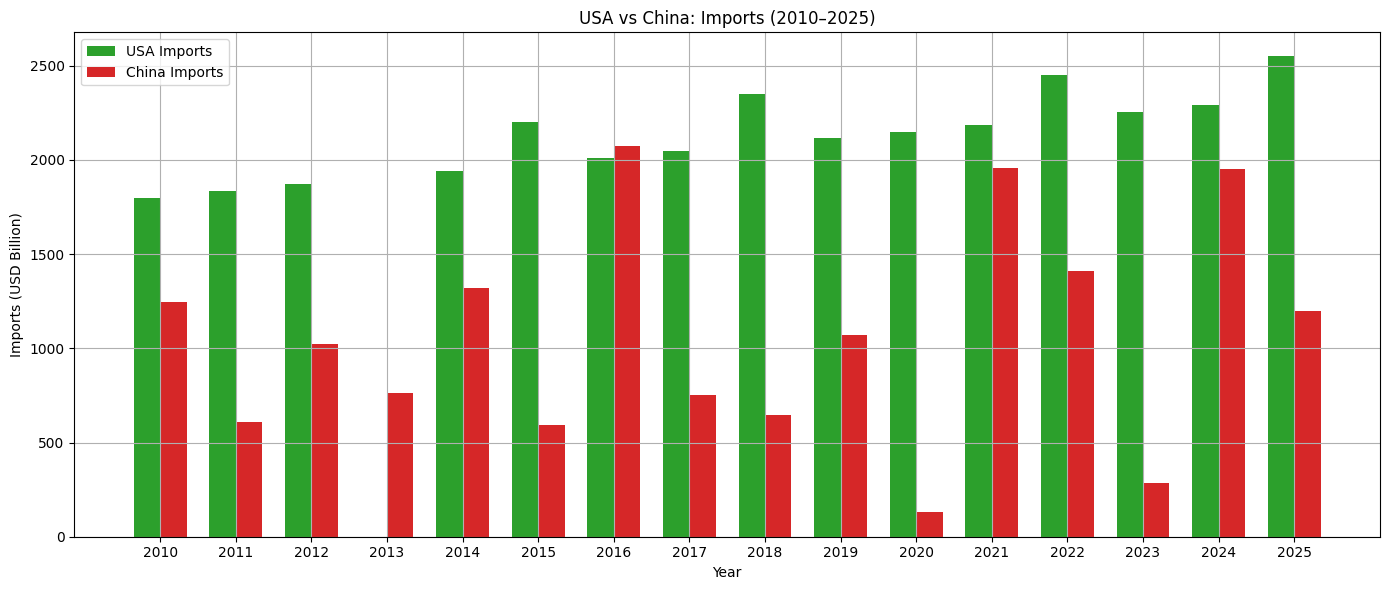

In [19]:
import matplotlib.pyplot as plt
import numpy as np


trade_data = df[(df['Country'].isin(['USA', 'China'])) & (df['Year'] >= 2010)]


exports = trade_data.pivot(index='Year', columns='Country', values='Exports_USD_Billion')
imports = trade_data.pivot(index='Year', columns='Country', values='Imports_USD_Billion')


years = exports.index
x = np.arange(len(years))  
width = 0.35  

fig, ax = plt.subplots(figsize=(14, 6))


ax.bar(x - width/2, exports['USA'], width, label='USA Exports', color='#1f77b4')
ax.bar(x + width/2, exports['China'], width, label='China Exports', color='#ff7f0e')


fig2, ax2 = plt.subplots(figsize=(14, 6))
ax2.bar(x - width/2, imports['USA'], width, label='USA Imports', color='#2ca02c')
ax2.bar(x + width/2, imports['China'], width, label='China Imports', color='#d62728')


ax.set_title('USA vs China: Exports (2010–2025)')
ax.set_xlabel('Year')
ax.set_ylabel('Exports (USD Billion)')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()
ax.grid(True)


ax2.set_title('USA vs China: Imports (2010–2025)')
ax2.set_xlabel('Year')
ax2.set_ylabel('Imports (USD Billion)')
ax2.set_xticks(x)
ax2.set_xticklabels(years)
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

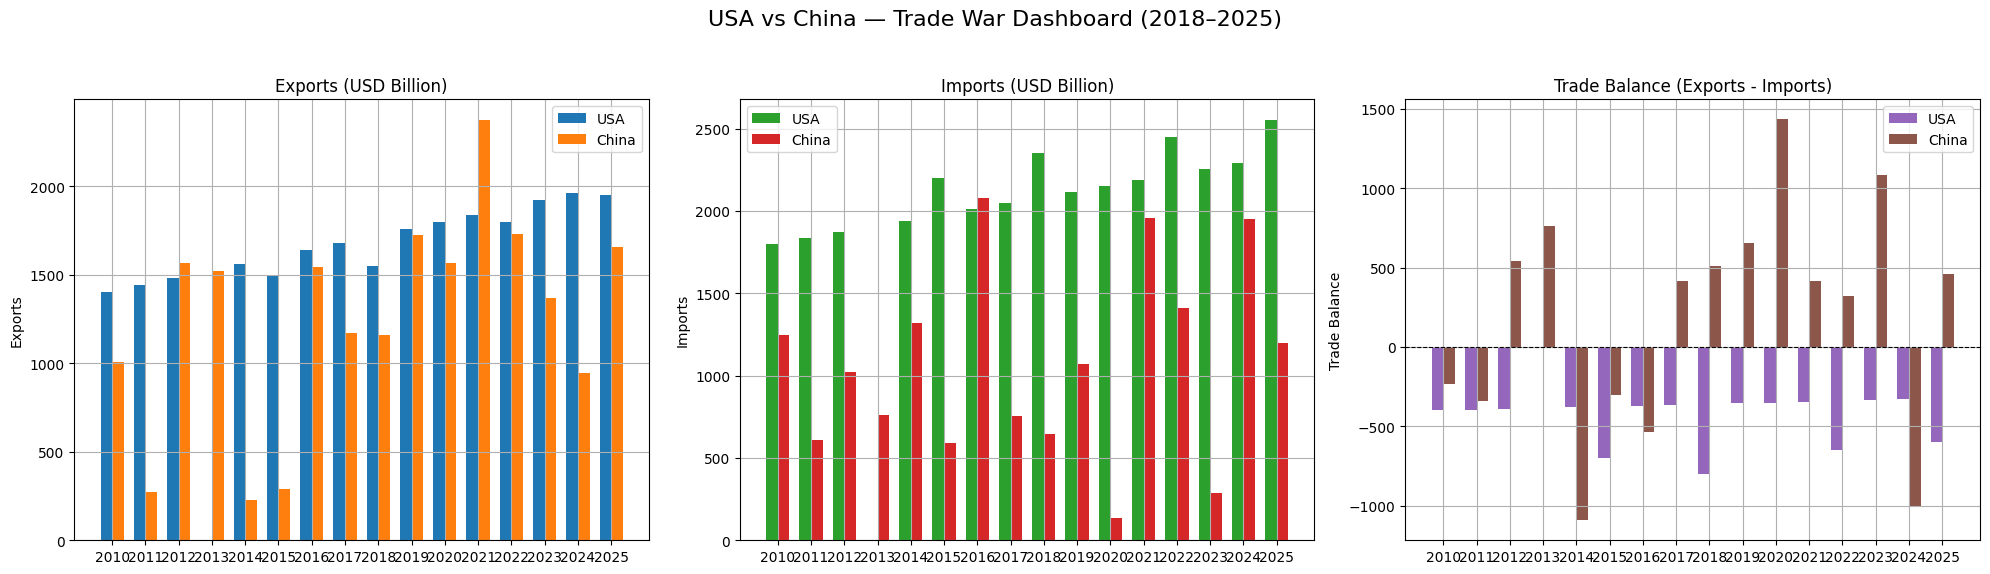

In [22]:
import matplotlib.pyplot as plt
import numpy as np


trade_data = df[(df['Country'].isin(['USA', 'China'])) & (df['Year'] >= 2010)]
years = sorted(trade_data['Year'].unique())
x = np.arange(len(years))
width = 0.35


exports = trade_data.pivot(index='Year', columns='Country', values='Exports_USD_Billion')
imports = trade_data.pivot(index='Year', columns='Country', values='Imports_USD_Billion')
balance = trade_data.pivot(index='Year', columns='Country', values='Trade_Balance')


fig, axs = plt.subplots(1, 3, figsize=(20, 6), sharex=True)


axs[0].bar(x - width/2, exports['USA'], width, label='USA', color='#1f77b4')
axs[0].bar(x + width/2, exports['China'], width, label='China', color='#ff7f0e')
axs[0].set_title("Exports (USD Billion)")
axs[0].set_xticks(x)
axs[0].set_xticklabels(years)
axs[0].set_ylabel("Exports")
axs[0].legend()
axs[0].grid(True)


axs[1].bar(x - width/2, imports['USA'], width, label='USA', color='#2ca02c')
axs[1].bar(x + width/2, imports['China'], width, label='China', color='#d62728')
axs[1].set_title("Imports (USD Billion)")
axs[1].set_xticks(x)
axs[1].set_xticklabels(years)
axs[1].set_ylabel("Imports")
axs[1].legend()
axs[1].grid(True)


axs[2].bar(x - width/2, balance['USA'], width, label='USA', color='#9467bd')
axs[2].bar(x + width/2, balance['China'], width, label='China', color='#8c564b')
axs[2].set_title("Trade Balance (Exports - Imports)")
axs[2].set_xticks(x)
axs[2].set_xticklabels(years)
axs[2].set_ylabel("Trade Balance")
axs[2].axhline(0, color='black', linestyle='--', linewidth=0.8)
axs[2].legend()
axs[2].grid(True)


plt.suptitle("USA vs China — Trade War Dashboard (2018–2025)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

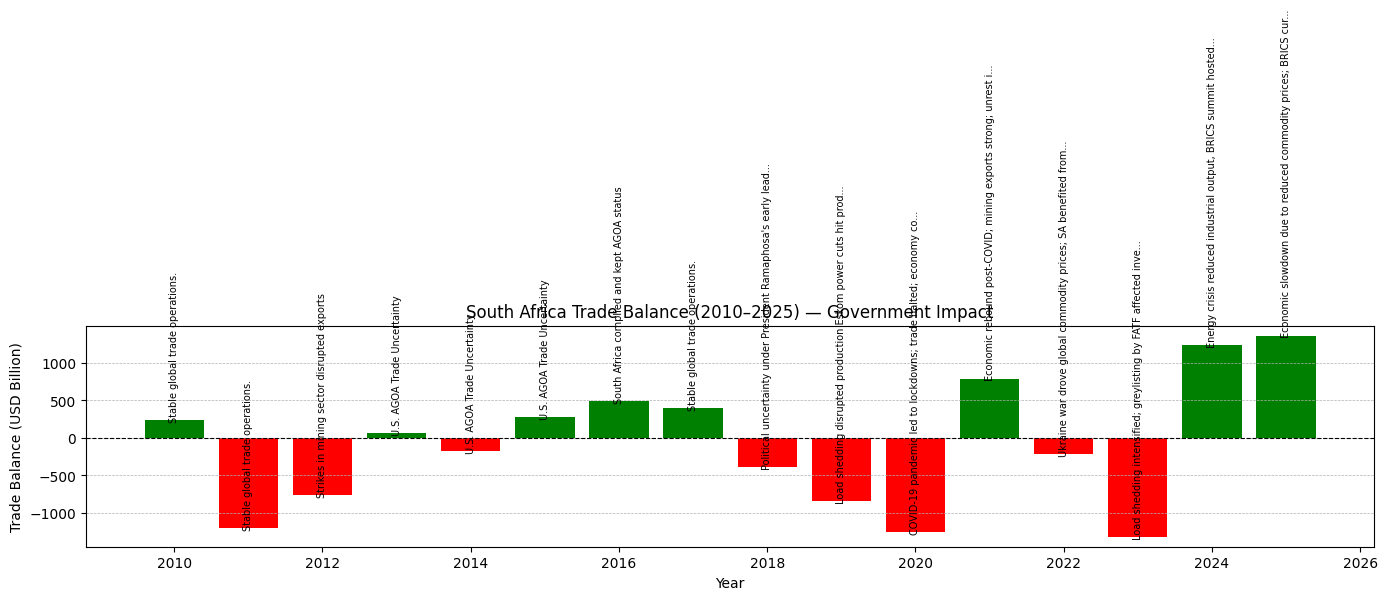

<Figure size 640x480 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt


sa_df = df[(df['Country'] == 'South Africa') & (df['Year'] >= 2010)]


plt.figure(figsize=(14, 6))
bars = plt.bar(
    sa_df['Year'],
    sa_df['Trade_Balance'],
    color=['green' if x > 0 else 'red' for x in sa_df['Trade_Balance']]
)

plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.title("South Africa Trade Balance (2010–2025) — Government Impact")
plt.xlabel("Year")
plt.ylabel("Trade Balance (USD Billion)")
plt.grid(axis='y', linestyle='--', linewidth=0.5)


for i, row in sa_df.iterrows():
    note = str(row['Notes'])
    y = row['Trade_Balance']
    
   
    short_note = note[:60] + "..." if len(note) > 60 else note
    if note.strip() and note != 'nan':
        plt.text(row['Year'], y + (1 if y > 0 else -2), short_note, ha='center', fontsize=7, rotation=90)

plt.tight_layout()
plt.show()
